In [2]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

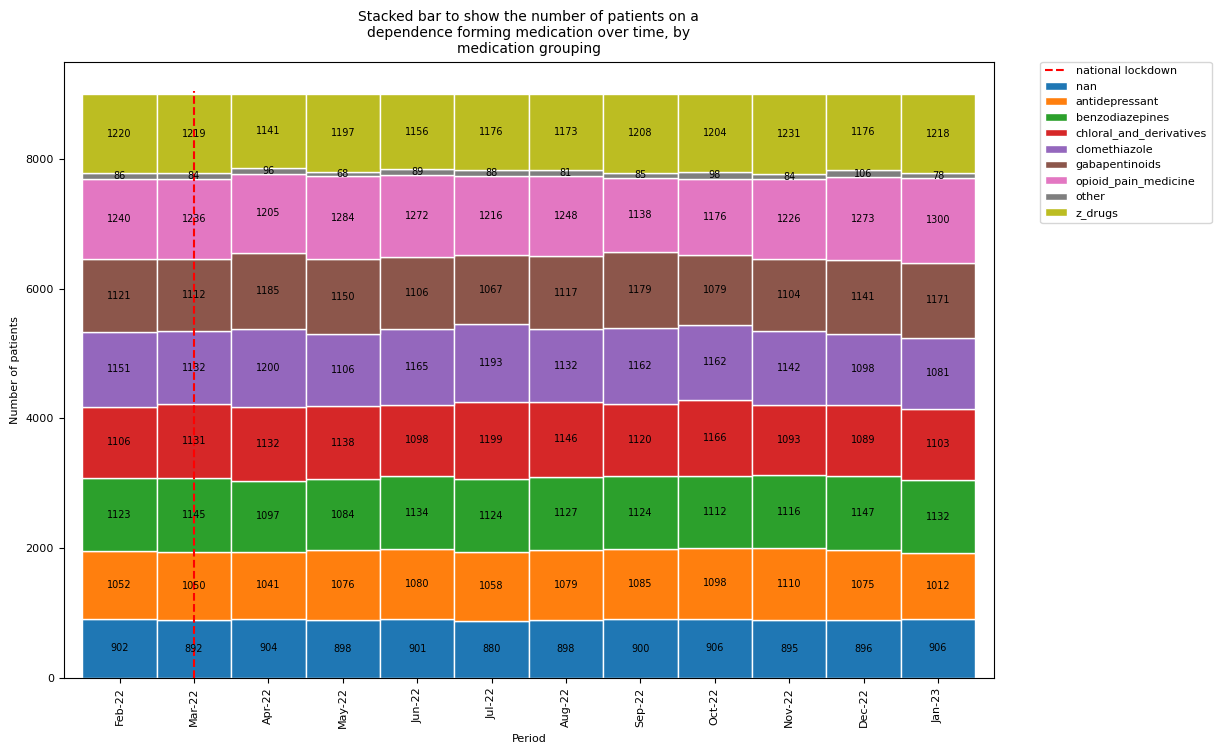

In [9]:
data_measure_dfm_medications_grouped_rate = pd.read_csv("output/measure_dfm_medications_grouped_rate.csv", parse_dates=["date"])
df_measure_dfm_medications_grouped_rate = pd.DataFrame.pivot(data_measure_dfm_medications_grouped_rate, index='date', columns='medication', values='research_population')
df_measure_dfm_medications_grouped_rate.index = pd.to_datetime(df_measure_dfm_medications_grouped_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_grouped_rate.plot.bar(stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of patients', fontsize=8)
ax.vlines(
        x=1, # remember to update index
        ymin=0,
        ymax=9050,
        colors="red",
        ls="--",
        label="national lockdown",
    )
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Stacked bar to show the number of patients on a dependence forming medication over time, by medication grouping'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.savefig("output/measure_dfm_medications_grouped_rate_bar.png", bbox_inches='tight', dpi=100)
plt.show()


In [7]:
%cd C:\Users\rachel.seeley\Documents\GitHub\dfms-covid19


C:\Users\rachel.seeley\Documents\GitHub\dfms-covid19
